## Definition der Konstanten

In [6]:

# Stromverbrauch gemessen im Betrieb: ~140 mA
a_on = 140.0E-3

# Stromverbrauch gemessen im Idlebetrieb (Sensor angeschaltet): ~1.4 mA
a_idle_sensoron = 1.4E-3

# Stromverbrauch gemessen im Idlebetrieb (Sensor ausgeschaltet): ~0.04 mA
a_idle_sensoroff = 40.0E-6

# Programmlaufzeit: ~4s
t_on_s = 4.0

# Kapazizät der Batterie: 2962 mA/h
# https://www.akkuline.de/test/energizer-l91-lithium-aa-test-messung?tlid=233
c_battery = 2962.0E-3



## Berechnung des durchschnittlichen Stromverbrauchs

Der durchschnittliche Stromverbrauch je Programmzyklus ergibt sich somit aus dem Verhältnis zwischen aktivem und passivem Modus (duty cycle). <br>
<img src="stromverbrauch.png" title="stromverbrauch" width="1200"/>
<br>
$I_{avg} = \frac{I_{aktiv}\cdot t_{aktiv} + I_{passiv} \cdot t_{passiv}}{t_{aktiv} + t_{passiv}}$
<br>
<br>
Anzumerken ist hier jedoch noch, dass der Mikrocontroller eine gewisse Zeit und einen gewissen Strom benötigt, um den Modus zu wechseln. <br>
Diese Kennzahlen sollten für ein präzises Modell aus dem Datenblatt entnommen werden,
was wir für unser Projekt erstmal vernachlässigt haben.
<br>
## Berechnung der durchschnittlichen Laufzeit im Batteriebetrieb (2x AA Batterie in Reihe)

Die Laufzeit im Batteriebetrieb lässt sich über die Kapazität der Batterie(n) und des durchschnittlichen Stromverbrauchs ermitteln

$t_{Laufzeit} = \frac{C_{Batterie}}{I_{avg}}$


interactive(children=(Checkbox(value=True, description='sensor_on'), FloatSlider(value=0.0, description='t_sle…

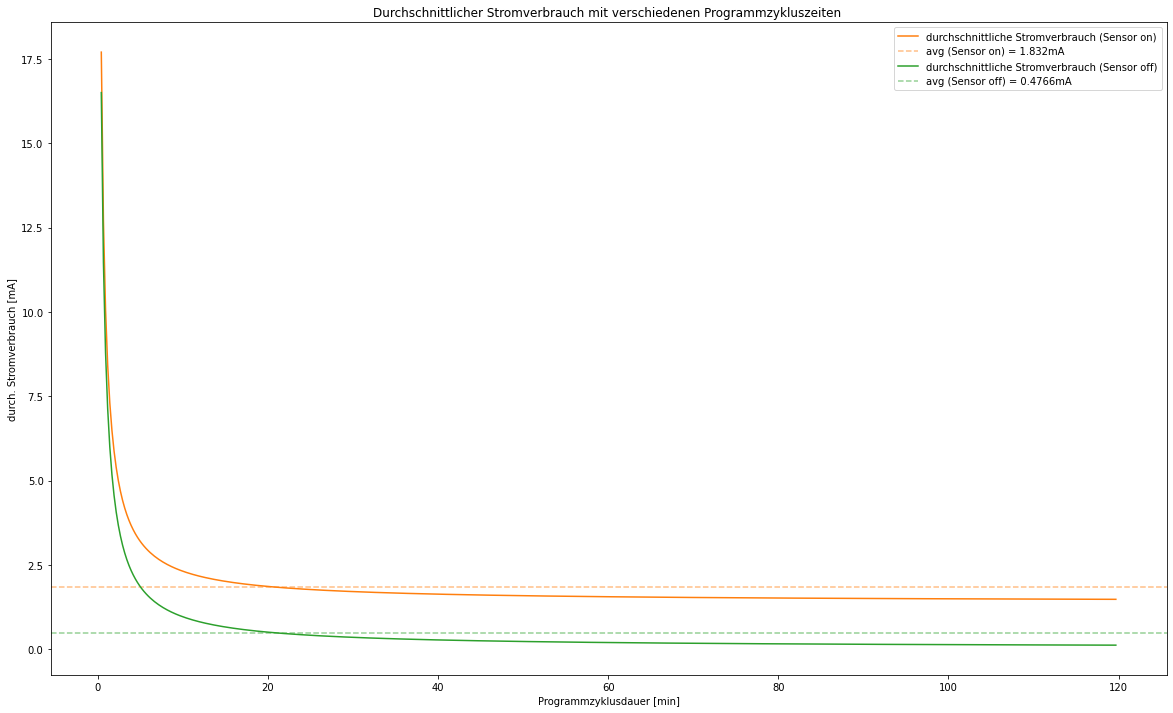

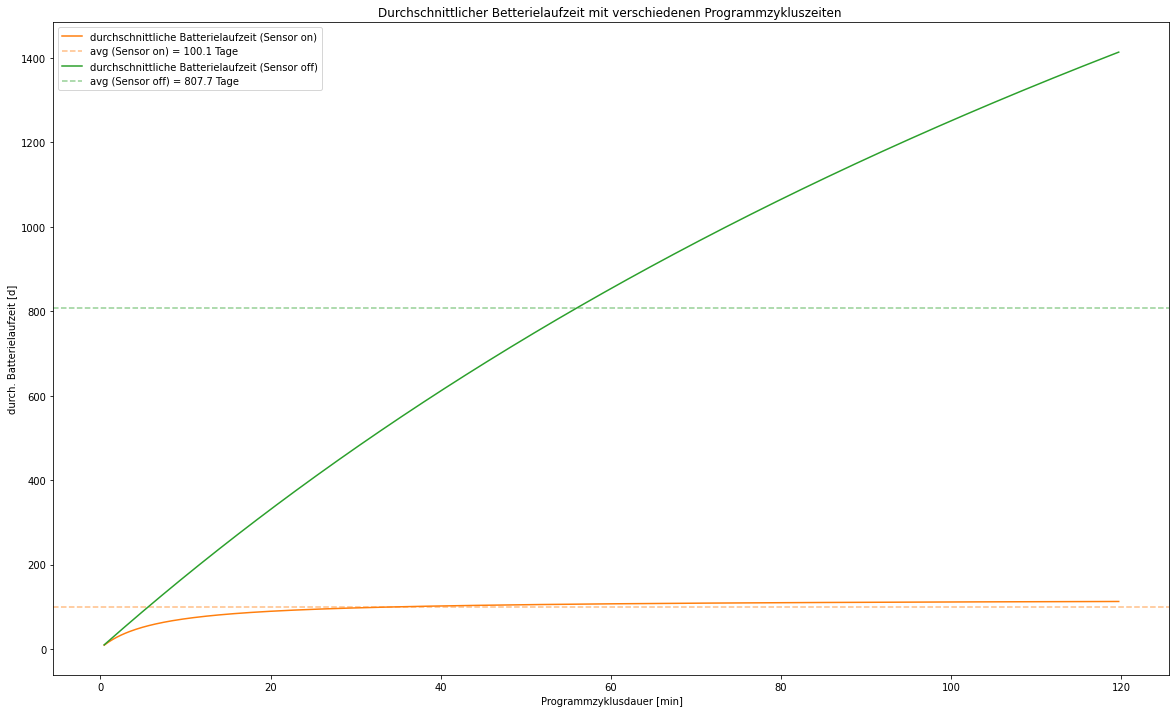

In [7]:
'''
    Skript zur Simulation der Batterielaufzeit für den Luftfeuchtigkeits / Temperatursensor im Zuge des Projektes Netzbasierte Systeme
    IKT Master - HTW Berlin
    Copyright: Sidney Göhler
'''

import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

class color():
       PURPLE = '\033[95m'
       CYAN = '\033[96m'
       DARKCYAN = '\033[36m'
       BLUE = '\033[94m'
       GREEN = '\033[92m'
       YELLOW = '\033[93m'
       RED = '\033[91m'
       BOLD = '\033[1m'
       UNDERLINE = '\033[4m'
       END = '\033[0m'

def plotStromverbrauch(t_on_idle_r):
    
    
    t_sleep_s = t_on_idle_r * 60
    
    a_idle = [a_idle_sensoron, a_idle_sensoroff]
    label_list = ['Sensor on', 'Sensor off']
    color_list = ['tab:orange', 'tab:green']
    a_avg_l = []
    
    
    fig1 = plt.figure(figsize=(20, 12))
    plt.title(f'Durchschnittlicher Stromverbrauch mit verschiedenen Programmzykluszeiten ')
    
    t_zyklus_min = (t_sleep_s - t_on_s) / 60
    
    for a_i, l, co in zip(a_idle, label_list, color_list):
    
        a_avg = (a_on * t_on_s + a_i * t_sleep_s) / (t_on_s + t_sleep_s)
        
        a_avg_l.append(a_avg)

        a_avg_m = np.mean(a_avg) * 1000
        
        plt.plot(t_zyklus_min, a_avg * 1000, c=co, label=f'durchschnittliche Stromverbrauch ({l})')
        plt.axhline(a_avg_m, 0, 1, c=co, linestyle='--', lw=1.5, alpha=0.5, label=f'avg ({l}) = {a_avg_m:.4}mA')
        plt.xlabel('Programmzyklusdauer [min]')
        plt.ylabel('durch. Stromverbrauch [mA]')

        #plt.xlim((1, np.max(t_zyklus_min) + 1))
    
    plt.legend()
    plt.show()
    
    return a_avg_l
    
def plotBatterielaufzeit(t_on_idle_r, a_avg_l):
    
    t_sleep_s = t_on_idle_r * 60
    
    label_list = ['Sensor on', 'Sensor off']
    color_list = ['tab:orange', 'tab:green']
    
    fig1 = plt.figure(figsize=(20, 12))
    plt.title(f'Durchschnittlicher Betterielaufzeit mit verschiedenen Programmzykluszeiten ')
    
    t_zyklus_min = (t_sleep_s - t_on_s) / 60
    
    for a_i, l, co in zip(a_avg_l, label_list, color_list):
        
        laufzeit = ((c_battery * 60) / a_i)
        
        avg_laufzeit_d = np.mean(laufzeit) / 60 / 24
        
        plt.plot(t_zyklus_min, laufzeit / 60 / 24, c=co, label=f'durchschnittliche Batterielaufzeit ({l})')
        plt.axhline(avg_laufzeit_d, 0, 1, c=co, linestyle='--', lw=1.5, alpha=0.5, label=f'avg ({l}) = {avg_laufzeit_d:.4} Tage')
        plt.xlabel('Programmzyklusdauer [min]')
        plt.ylabel('durch. Batterielaufzeit [d]')
        
    plt.legend()
    plt.show()

    

t_on_idle_range = np.arange(0.5, 120, 0.25)

@interact(sensor_on = True, t_sleep_min = widgets.FloatSlider(min = 0.0, max = 60.0, step = 0.1, value = 0.0))
def printStromverbrauch(sensor_on, t_sleep_min):
    
    t_sleep_s = t_sleep_min * 60
    
    t_off = t_sleep_s
    
    t_str = f'{color.BOLD}Zykluszeiten: {int(t_on_s)}s on | {int(t_sleep_s)}s off{color.END} '
    
    print(t_str)
    
    duty_on = 100 * (t_on_s / (t_on_s + t_sleep_s))
    
    duty_off = 100 - duty_on
    
    duty_str = f'{color.BOLD}Duty cycle: {duty_on:.5}% on | {duty_off:.5}% off{color.END}'
    
    print(duty_str)
    
    a_idle = a_idle_sensoron if sensor_on else a_idle_sensoroff
    
    a_avg = (a_on * t_on_s + a_idle * t_sleep_s) / (t_on_s + t_sleep_s)
    
    a_avg_str = f'{color.BOLD}Durch. Stromverbrauch: {color.YELLOW if sensor_on else color.GREEN}{a_avg * 1000:.4}mA{color.END}'
    
    print(a_avg_str)
    
    laufzeit_d = ((c_battery * 60) / a_avg) / 60 / 24
    
    laufzeit_d_str = f'{color.BOLD}Durch. Laufzeit im Batteriebetrieb: {color.YELLOW if sensor_on else color.GREEN}{laufzeit_d:.4}d{color.END}'
    
    print(laufzeit_d_str)

    
#############################################################################################################

    
a_avg_l = plotStromverbrauch(t_on_idle_range)
plotBatterielaufzeit(t_on_idle_range, a_avg_l)

    
